# Machine Learning Tutorial: Building a Wine Snob

This is an end-to-end Python machine learning tutorial, I will show how to build and tune a supervised learning model for wine quality.

- **What will you learn?**
    + Set up Python environment for your ML project
    + Using libraries to create a ML model
    + Preparing data for training ML model
    + Training and tunning ML model
    + Evaluate the model
    + Save model

## Setup Environment

- **What we need:**
    + Python (We will use Python 3+, Python 2 will not be maintained after 2020)
    + Numpy (Fundamental package for scientific computing with Python - http://www.numpy.org/)
    + Pandas (Data analysis library for Python - https://pandas.pydata.org/)
    + Scikit-learn (Machine Learning library for Python - http://scikit-learn.org/stable/)
 
- You can install these libraries one by one: First install python and then install the libraries.

- Better way: Install Python through Anaconda (Package which included many libraries for ML and data science - https://www.anaconda.com/).

- Installation guide: https://docs.anaconda.com/anaconda/install/

- Go ahead and install Anaconda on your machine. It will take a while :)

- Check your installation, run command line:
    
    ``$ python -c "import sklearn; print(sklearn.__version__)";``

### Create a Virtual Environment

- Problem when working with multiple python projects: libraries conflict

- Solution: Create separate python environments for different projects

- We can easily create an environments with Anaconda.

- Let's create an environment for today's tutorial:
    
    ``conda create -n py3dl python=3.5 anaconda``


- After create the environment, we need to active it to use:
    
    ``source activate py3dl``

### Jupyter Notebook

- We need an IDE (Integrated Development Environment) to write and run codes
- For Python there are many great IDEs: VS code, PyCharm, Spider, ...
- My choice: Jupyter Notebook
    + Provide a very easy-to-use interactive environment
    + Doesn't work only as an IDE, but as presentation and education tool
    + Just perfect to start ML & Data Science carrer

Jupyter Notebook is also included in anaconda. You already can start a Jupyter Notebook.

``jupyter notebook``

Learn more about this great tool: http://jupyter.org/

BTW, this tutorial is created with Jupyter Notebook.

## Create a Machine Learning Model

### Import libraries

First we need to import needed libraries

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.externals import joblib

We will create a machine learning model to clasify wine quality based on traits like acidity, residual sugar, and alcohol concentration.

Five core steps for a ML projects:

### Step 1: Data Exploration

The first thing we need for a ML project is to understand the data.

In this tutorial we use a wine quality data set from UCI Machine Learning Repository: http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [4]:
dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url)
data.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [5]:
data = pd.read_csv(dataset_url, sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data.shape

(1599, 12)

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109ed8390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1045a5a90>]], dtype=object)

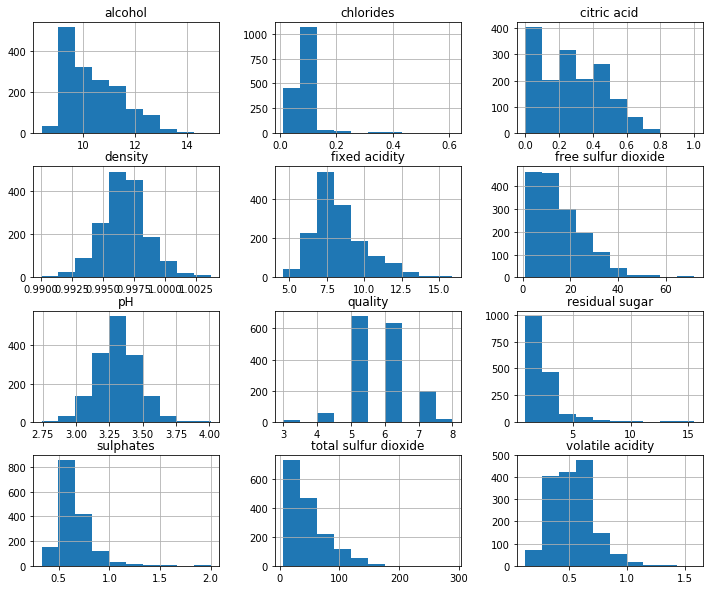

In [7]:
data.hist(figsize=(12,10))

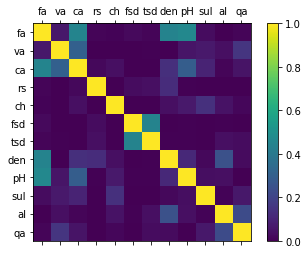

In [21]:
# plot correlation matrix
correlations = data.corr()
correlations = correlations ** 2
names = ["fa", "va", "ca", "rs", "ch", "fsd", "tsd", "den", "pH", "sul", "al","qa"]
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

If you want to have more beautiful figure, learn to use Seaborn library: https://seaborn.pydata.org/

### Step 2: Preparing Data

After exploring the data, we need to clean and preproces the data so that we can use the data to traning our model.

#### Cleaning data: Very impormant ("garbage in = garbage out")

- Unwanted observations: Duplicate observations, Irrelevant observations
- Structural errors
- Missing data

(To much for today, we will need another day :))

Fortunately, our wine data is clean, we can skip this cleaning process.

#### Preprocessing

- **Separate our target (y) features from our input (X) features**

Here is the list of all features: 

In [10]:
print(data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


Our problem is to classify wine quality, so here 'quality' is our target features.

In [22]:
y = data.quality
X = data.drop('quality', axis=1)

- **Split data into training and test set**

This is crucial step for a ML project. We will train the ML model on training set and evaluate its performance with the test set. Normally we set 15%-30% of the data as a test set.

This step can be easili done with Scikit-Learn's tran_test_split function:

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

Rule of thumb: use stratify with target variable. This ensure training set look similar to test set.

- **Standardize Data**

Look at the data: all of the features are numeric, which is convenient. However, they have some very different scales. Normally for a ML model work better we need to standardize the features to the same scale (from 0 to 1).

Standardization is the process of subtracting the means from each feature and then dividing by the feature standard deviations.

Let's see how to do this with Scikit learn:

In [18]:
scaler = preprocessing.StandardScaler().fit(X_train)

We create the ``scaler`` to save means and standard deviations for each feature in the training set. This object will be used to standardize training set and test set.

In [19]:
X_train_scaled = scaler.transform(X_train)
print(X_train_scaled.mean(axis=0))
print(X_train_scaled.std(axis=0))

[  1.16664562e-16  -3.05550043e-17  -8.47206937e-17  -2.22218213e-17
   2.22218213e-17  -6.38877362e-17  -4.16659149e-18  -2.54439854e-15
  -8.70817622e-16  -4.08325966e-16  -1.17220107e-15]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [20]:
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled.mean(axis=0))
print(X_test_scaled.std(axis=0))

[ 0.02776704  0.02592492 -0.03078587 -0.03137977 -0.00471876 -0.04413827
 -0.02414174 -0.00293273 -0.00467444 -0.10894663  0.01043391]
[ 1.02160495  1.00135689  0.97456598  0.91099054  0.86716698  0.94193125
  1.03673213  1.03145119  0.95734849  0.83829505  1.0286218 ]


### Step 3: Choosing a Classification Algorithm

After preparing data we need to select a classification algorithm for our problem. This is complex process, and requires alot of practices.

We need to read more :). Suggested books "Python Machine Learning".

We may need to have other tutorials for how to choose ML algorithms.

For this tutorial, we gona use Random Forest for our task. Random Forest is an ensemble model (bagging) tend to perform very well right out of the box. Offen considered as a "swiss-army-knife" algorithm that almost always gets good results.

Our task is to predict a quality value, we gonna ``RandomForestRegressor`` for this task:

### Step 4: Training Model

- **Make a pipeline**

For training process, we offen make a pipeline with preprocessing and model. This pipeline first standardize the data using StandardScaler() and the fits a model using random forest regressor.

In [23]:
pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100))

- **Tuning**

Select value of *hyperparameters* so that our model has good performance. 

*Hyperparameters* express "higher-level" structural information about the model, and they are typically set before training the model.

Different algorithms have different hyperparameters. Let's see which hyperparameters can we tune for our pipeline: 

In [24]:
print(pipeline.get_params())

{'steps': [('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))], 'randomforestregressor__min_samples_split': 2, 'randomforestregressor': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 'standardscaler__with_std': True, 'random

In [27]:
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                   'randomforestregressor__max_depth': [None, 5, 3, 1]}

- **Tune model using cross-validation**

In order to tune a model we need to evaluate the model, but we should not using test set to evaluate model. A very important method for this is cross-validation (CV).

Cross-validation is a process for reliably estimating the performance of a method for building a model by training and evaluating your model multiple times using the same method.

Steps:

    + Split training data into k equal parts, or "folds" (typically k=10).
    + Train the model on k-1 folds (e.g. the first 9 folds).
    + Evaluate it on the remaining "hold-out" fold (e.g. the 10th fold).
    + Perform steps (2) and (3) k times, each time holding out a different fold.
    + Aggregate the performance across all k folds. This is your performance metric.
    
![](K-fold_cross_validation_EN.jpg)

Finally we need to create a pipeline that include the CV process as well. The pipeline will do:

    + Split your data into k equal parts, or "folds" (typically k=10).
    + Preprocess k-1 training folds.
    + Train your model on the same k-1 folds.
    + Preprocess the hold-out fold using the same transformations from step (2).
    + Evaluate your model on the same hold-out fold.
    + Perform steps (2) - (5) k times, each time holding out a different fold.
    + Aggregate the performance across all k folds. This is your performance metric.

In [28]:
clf = GridSearchCV(pipeline, hyperparameters, cv=10)

Now we can fit and tune model:

In [29]:
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decr...mators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'randomforestregressor__max_depth': [None, 5, 3, 1], 'randomforestregressor__max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

After fiting we can see the best set of hyperparameters:

In [30]:
print(clf.best_params_)

{'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'sqrt'}


Using CV, the model is not fitting with the whole training set. TO get a small performance imporvement we can refitting the model with the best hyperparameters using entire training set.

Luckily, Sklearn GridSearchCV do this automatically, if this function (refit) is on.

In [31]:
print(clf.refit)

True


### Step 4: Evaluate Model

Now we have trained the model with training set. This step is to see how well the model perform on the test set (the data it hasn't seen before)

In [33]:
y_pred = clf.predict(X_test)

We will use $R^2$ score and meam squared error (MSE) to evaluate the model performance.

In [34]:
print(r2_score(y_test, y_pred))

0.449445608088


In [35]:
print(mean_absolute_error(y_test, y_pred))

0.4244375


This performance may be not good enough (depends on our goal of model).

We can use this numbers to compare performance of different models.

If performance is not good enough, there are various ways to improve the model:

- Try other algorithm (more complex, more generalized, ...)
- Collect more data
- Feature engineering

### Save model for future use

If the trained model has good enough performance, we can save the model so that we can use it in our application.

In [26]:
joblib.dump(clf, 'wine_classifier.pkl')

NameError: name 'clf' is not defined

### Load model to use in our application

Simply use this:

In [31]:
wine_snob = joblib.load('wine_classifier.pkl')

Now we can use ``wine_snob`` to predict wine quality

In [32]:
wine_1_quality = wine_snob.predict(X_test.iloc[[1]]) 

In [33]:
print(wine_1_quality)

[ 5.67]


In [30]:
y_test

797     7
871     5
1333    5
1463    6
1058    7
1130    6
1037    5
735     5
1560    5
1224    6
445     6
85      5
813     4
545     5
787     6
148     6
938     7
774     6
305     6
1002    7
920     5
1441    6
71      5
1487    5
449     6
590     5
77      6
457     5
571     6
1021    6
       ..
1484    4
392     5
992     6
1215    6
1129    6
406     6
1182    6
921     6
827     5
367     5
1415    5
1198    6
150     6
1068    7
821     7
552     6
197     6
536     5
894     6
1380    6
889     5
218     5
359     6
1024    7
1066    7
211     6
162     6
748     6
914     6
557     5
Name: quality, Length: 320, dtype: int64